In [1]:
### model1 전처리 ###

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
file_path = 'C:/Users/a/Desktop/프로젝트/model1.csv'
data1 = pd.read_csv(file_path)

data1.head()

,"last_name, first_name",player_id,year,pa,k_percent,bb_percent,isolated_power,xba,woba,xiso,...,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed
0,"Cabrera, Miguel",408234,2021,526,22.4,7.6,0.130,0.234,0.305,0.186,...,91.4,10.0,32.8,8.3,49.0,101.953387,95.613068,21.5,5.01,24.0
1,"Molina, Yadier",425877,2021,473,16.7,5.1,0.118,0.255,0.290,0.151,...,88.0,15.3,34.1,5.2,31.6,97.653775,92.936144,21.7,4.92,22.8
2,"Cruz Jr., Nelson",443558,2021,584,21.6,8.7,0.232,0.264,0.346,0.248,...,92.9,11.8,31.8,13.6,52.5,105.497885,97.364589,22.0,4.69,26.0
3,"Peralta, David",444482,2021,538,17.1,8.6,0.143,0.243,0.314,0.103,...,89.3,5.3,27.2,5.0,41.8,101.204663,94.748490,23.2,4.38,27.6
4,"Escobar, Alcides",444876,2021,349,16.0,4.9,0.116,0.271,0.325,0.091,...,81.7,11.1,36.3,3.0,21.0,93.737836,91.096948,28.8,4.36,27.5


In [4]:
# No missing data
missing_data = data1.isnull().sum()
missing_data

last_name, first_name    0
player_id                0
year                     0
pa                       0
k_percent                0
bb_percent               0
isolated_power           0
xba                      0
woba                     0
xiso                     0
wobacon                  0
xwobacon                 0
xbacon                   0
exit_velocity_avg        0
launch_angle_avg         0
sweet_spot_percent       0
barrel_batted_rate       0
hard_hit_percent         0
avg_best_speed           0
avg_hyper_speed          0
linedrives_percent       0
hp_to_1b                 0
sprint_speed             0
dtype: int64

In [5]:
# 모델1의 예측변수 woba에 대한 선수, 연도 데이터를 따로 생성
player_data = data1[['last_name, first_name','year','player_id','woba']]
player_data.head()

,"last_name, first_name",year,player_id,woba
0,"Cabrera, Miguel",2021,408234,0.305
1,"Molina, Yadier",2021,425877,0.290
2,"Cruz Jr., Nelson",2021,443558,0.346
3,"Peralta, David",2021,444482,0.314
4,"Escobar, Alcides",2021,444876,0.325


In [6]:
columns_of_interest = ['k_percent', 'bb_percent', 'xba', 'woba', 'xiso', 'xbacon',
     'launch_angle_avg', 'sweet_spot_percent',  'hard_hit_percent',
    'linedrives_percent', 'hp_to_1b', 'sprint_speed']

# Subsetting the data to these columns
selected_data = data1[columns_of_interest]

# Displaying a snapshot of selected columns to confirm selection
selected_data.head()

,k_percent,bb_percent,xba,woba,xiso,xbacon,launch_angle_avg,sweet_spot_percent,hard_hit_percent,linedrives_percent,hp_to_1b,sprint_speed
0,22.4,7.6,0.234,0.305,0.186,0.312,10.0,32.8,49.0,21.5,5.01,24.0
1,16.7,5.1,0.255,0.290,0.151,0.310,15.3,34.1,31.6,21.7,4.92,22.8
2,21.6,8.7,0.264,0.346,0.248,0.353,11.8,31.8,52.5,22.0,4.69,26.0
3,17.1,8.6,0.243,0.314,0.103,0.300,5.3,27.2,41.8,23.2,4.38,27.6
4,16.0,4.9,0.271,0.325,0.091,0.328,11.1,36.3,21.0,28.8,4.36,27.5


In [7]:
# Performing correlation analysis on the selected variables to see their relation with 'woba'
correlation_matrix = selected_data.corr()

# Extracting correlations of each feature with 'woba' for targeted insight
woba_correlations = correlation_matrix['woba'].sort_values(ascending=False)
woba_correlations

woba                  1.000000
xiso                  0.685940
xbacon                0.636695
xba                   0.609533
hard_hit_percent      0.535382
bb_percent            0.465344
sweet_spot_percent    0.333362
linedrives_percent    0.160668
launch_angle_avg      0.129969
sprint_speed         -0.007732
hp_to_1b             -0.008745
k_percent            -0.091422
Name: woba, dtype: float64

In [8]:
# Assuming `selected_data` is already extracted from the dataset
# Handling outliers by capping them at the 1st and 99th percentiles
for column in selected_data.columns:
    lower_bound = np.percentile(selected_data[column], 1)
    upper_bound = np.percentile(selected_data[column], 99)
    selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)

# Displaying summary statistics after outlier handling
selected_data.describe()

C:\Users\a\AppData\Local\Temp\ipykernel_42760\3252109571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_42760\3252109571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_42760\3252109571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,k_percent,bb_percent,xba,woba,xiso,xbacon,launch_angle_avg,sweet_spot_percent,hard_hit_percent,linedrives_percent,hp_to_1b,sprint_speed
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,21.910644,8.476565,0.249356,0.320854,0.165396,0.330535,13.031216,33.985249,39.963599,23.920583,4.467065,27.297496
std,5.716803,2.801871,0.024503,0.034659,0.053655,0.029617,4.521335,3.593069,7.224418,2.858725,0.194473,1.321672
min,10.017000,3.200000,0.191340,0.245000,0.066000,0.269170,2.800000,25.734000,21.634000,16.951000,4.110000,23.700000
25%,17.725000,6.400000,0.233000,0.298000,0.127250,0.310000,10.000000,31.500000,35.400000,21.825000,4.330000,26.400000
50%,21.600000,8.300000,0.249000,0.319500,0.161000,0.329000,13.150000,34.000000,40.150000,23.900000,4.430000,27.400000
75%,25.800000,10.300000,0.265000,0.343000,0.200000,0.350000,16.100000,36.375000,44.900000,25.900000,4.600000,28.300000
max,35.183000,15.900000,0.312830,0.419000,0.316660,0.411830,22.600000,42.900000,55.883000,30.900000,5.036600,30.100000


In [9]:
# Identify highly correlated factors and decide between MinMax and normalization.
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
highly_correlated_pairs

Series([], dtype: float64)

In [10]:
# Initialize scalers
standard_scaler = StandardScaler()

# Apply StandardScaler to proportion-based features
standard_scaler.fit_transform(selected_data)

array([[ 0.0856379 , -0.31299002, -0.62699248, ..., -0.84711413,
         2.79306947, -2.4960599 ],
       [-0.91186912, -1.20565032,  0.2304455 , ..., -0.77712157,
         2.33007395, -2.72314678],
       [-0.05436308,  0.07978052,  0.59791892, ..., -0.67213272,
         1.14686318, -0.98214737],
       ...,
       [-0.40436555, -0.95570543,  0.4345974 , ..., -0.28717361,
        -1.37389019,  1.81859082],
       [-0.85936875, -1.27706314,  2.39445564, ...,  0.72771859,
        -1.11667046,  0.9102433 ],
       [-1.66437441, -0.74146696,  0.4345974 , ...,  0.79771115,
        -0.19067943, -0.90645174]])

In [11]:
# Multicollinearity Check
# Calculate the correlation matrix on the scaled data
correlation_matrix = selected_data.corr()

# Identify pairs of features with correlation > 0.8
high_corr_pairs = []
threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display pairs of features with high correlation
high_corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_pairs_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

,Feature 1,Feature 2,Correlation
0,sprint_speed,hp_to_1b,-0.886159


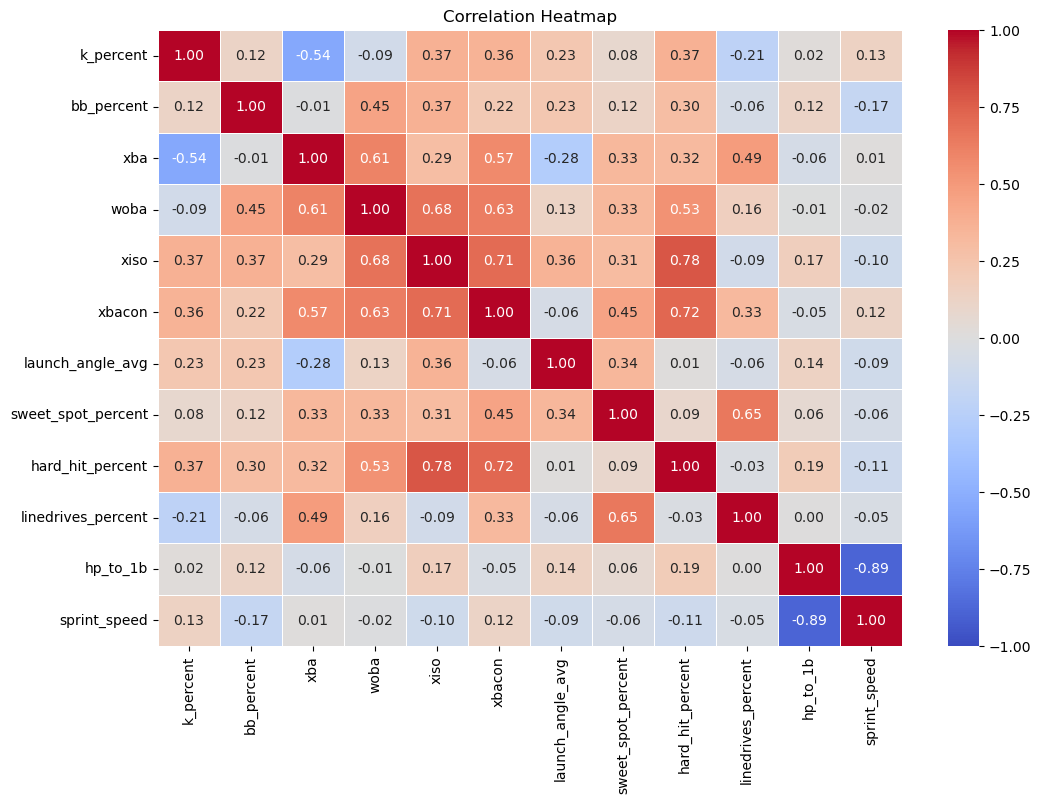

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_42760\2227544983.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['high_woba'] = (selected_data['woba'] > woba_median).astype(int)
C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_mod

Cross-validation Accuracy Scores: [0.76785714 0.76785714 0.80357143 0.79372197 0.79372197]
Mean Accuracy: 0.785345932094811
Accuracy: 0.8035714285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       107
           1       0.82      0.80      0.81       117

    accuracy                           0.80       224
   macro avg       0.80      0.80      0.80       224
weighted avg       0.80      0.80      0.80       224



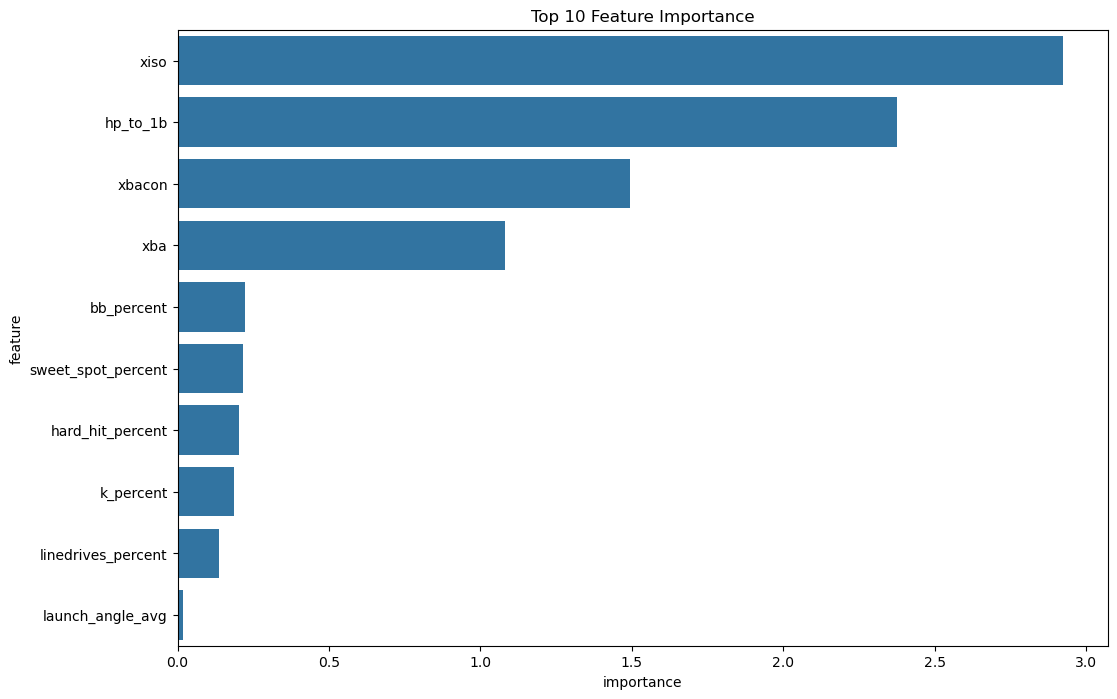

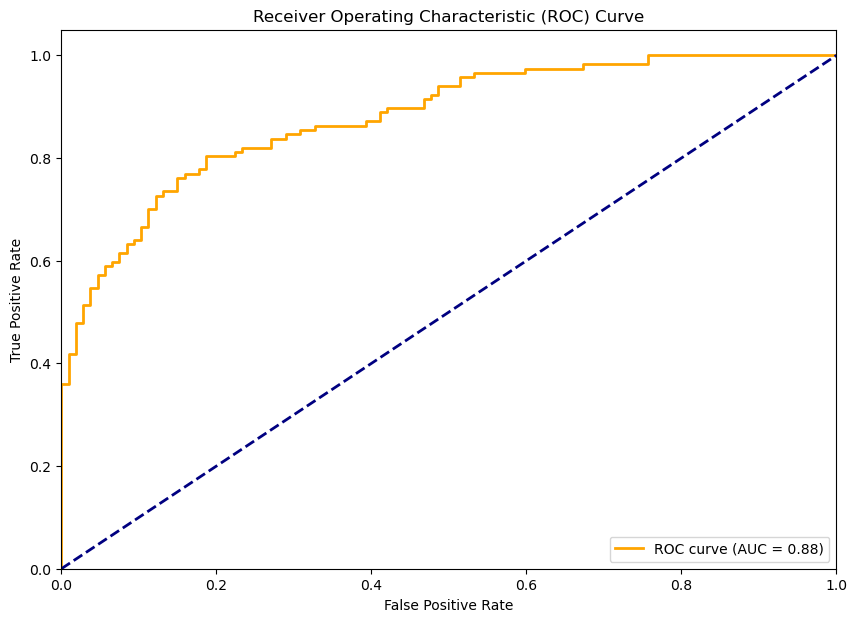

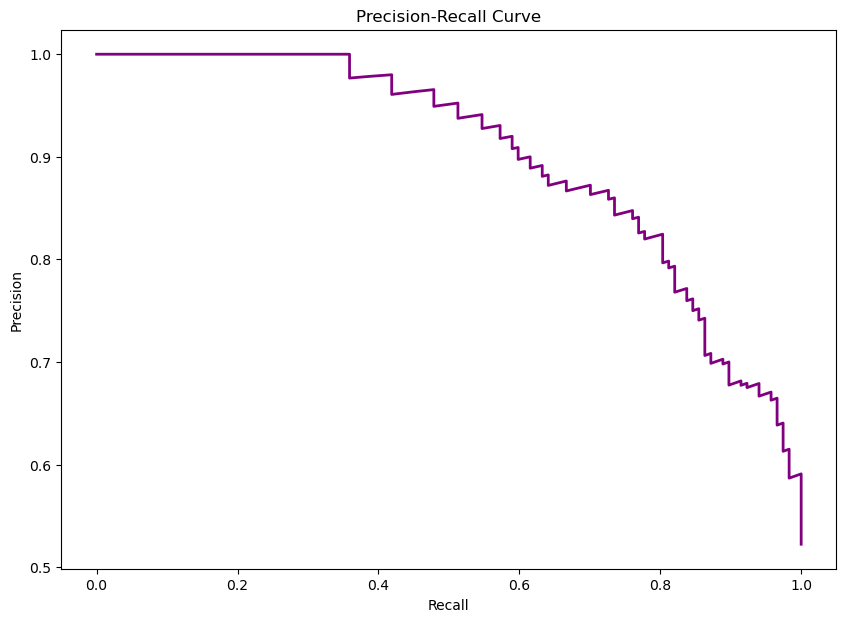

Test Set Performance Metrics:
Accuracy: 0.8036

Classification Report:
<function classification_report at 0x000001A8F19F6E80>
ROC-AUC: 0.8797


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve

# 'woba'를 기준으로 이진 분류 타겟 생성 (중앙값 기준)
woba_median = selected_data['woba'].median()
selected_data['high_woba'] = (selected_data['woba'] > woba_median).astype(int)

# 특성과 타겟 분리
X = selected_data.drop(['woba', 'high_woba'], axis=1)
y = selected_data['high_woba']

# 스케일러 학습
scaler = StandardScaler().fit(X)

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 (L2 정규화)
model = LogisticRegression(penalty='l2', C=1.0, random_state=42)
model.fit(X_train, y_train)

# 교차 검증을 통한 성능 평가
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')

# 예측
y_pred = model.predict(X_test)
# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# 특성 중요도 시각화
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.show()

# ROC 곡선
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Calculating ROC-AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Outputting the results
print("Test Set Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report)
print(f"ROC-AUC: {roc_auc:.4f}")

In [14]:
# Calculate the proportion of each feature's importance relative to the total importance
feature_importance['importance_ratio'] = feature_importance['importance'] / feature_importance['importance'].sum()

# Display the updated feature importance with ratios in percentage format
feature_importance['importance_ratio'] = feature_importance['importance_ratio'] * 100  # Convert to percentage

print(feature_importance.head(10))

              feature  importance  importance_ratio
3                xiso    2.923907         33.005507
9            hp_to_1b    2.376041         26.821112
4              xbacon    1.492272         16.844992
2                 xba    1.081438         12.207433
1          bb_percent    0.223158          2.519044
6  sweet_spot_percent    0.214639          2.422872
7    hard_hit_percent    0.201822          2.278202
0           k_percent    0.186847          2.109155
8  linedrives_percent    0.137690          1.554268
5    launch_angle_avg    0.019244          0.217232


In [15]:
########## 여기까지가 로지스틱 회귀 모델 성능 평가 지표 #############

In [16]:
# 연도별 데이터 분리
data_by_year = {year: player_data[player_data['year'] == year] for year in range(2021, 2025)}

# 조건별로 중복 없는 그룹 생성
full_years_players = player_data.groupby('last_name, first_name').filter(
    lambda x: set(range(2021, 2025)).issubset(x['year'].values)
)
remaining_players = player_data[~player_data['last_name, first_name'].isin(full_years_players['last_name, first_name'])]

three_years_players = remaining_players.groupby('last_name, first_name').filter(
    lambda x: set(range(2022, 2025)).issubset(x['year'].values)
)
remaining_players = remaining_players[~remaining_players['last_name, first_name'].isin(three_years_players['last_name, first_name'])]

two_years_players = remaining_players.groupby('last_name, first_name').filter(
    lambda x: set(range(2023, 2025)).issubset(x['year'].values)
)
remaining_players = remaining_players[~remaining_players['last_name, first_name'].isin(two_years_players['last_name, first_name'])]

one_year_players = remaining_players.groupby('last_name, first_name').filter(
    lambda x: 2024 in x['year'].values and len(x['year'].unique()) == 1
)

# 선수 수 출력
print(f"21~24년 데이터를 모두 가진 선수 수: {full_years_players['last_name, first_name'].nunique()}")
print(f"22~24년 데이터를 가진 선수 수: {three_years_players['last_name, first_name'].nunique()}")
print(f"23~24년 데이터를 가진 선수 수: {two_years_players['last_name, first_name'].nunique()}")
print(f"24년 데이터만 가진 선수 수: {one_year_players['last_name, first_name'].nunique()}")

# 시뮬레이션 샘플 수를 설정
num_samples = (
    full_years_players['last_name, first_name'].nunique() +
    three_years_players['last_name, first_name'].nunique() +
    two_years_players['last_name, first_name'].nunique() +
    one_year_players['last_name, first_name'].nunique()
)

print(f"2025년 시뮬레이션 샘플 수: {num_samples}")

21~24년 데이터를 모두 가진 선수 수: 103
22~24년 데이터를 가진 선수 수: 47
23~24년 데이터를 가진 선수 수: 57
24년 데이터만 가진 선수 수: 58
2025년 시뮬레이션 샘플 수: 265


In [17]:
selected_data['player_id'] = player_data['player_id']
selected_data['year'] = player_data['year']
selected_data['last_name, first_name'] = player_data['last_name, first_name']
selected_data.head()

C:\Users\a\AppData\Local\Temp\ipykernel_42760\2627160691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['player_id'] = player_data['player_id']
C:\Users\a\AppData\Local\Temp\ipykernel_42760\2627160691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['year'] = player_data['year']
C:\Users\a\AppData\Local\Temp\ipykernel_42760\2627160691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,k_percent,bb_percent,xba,woba,xiso,xbacon,launch_angle_avg,sweet_spot_percent,hard_hit_percent,linedrives_percent,hp_to_1b,sprint_speed,high_woba,player_id,year,"last_name, first_name"
0,22.4,7.6,0.234,0.305,0.186,0.312,10.0,32.8,49.000,21.5,5.01,24.0,0,408234,2021,"Cabrera, Miguel"
1,16.7,5.1,0.255,0.290,0.151,0.310,15.3,34.1,31.600,21.7,4.92,23.7,0,425877,2021,"Molina, Yadier"
2,21.6,8.7,0.264,0.346,0.248,0.353,11.8,31.8,52.500,22.0,4.69,26.0,1,443558,2021,"Cruz Jr., Nelson"
3,17.1,8.6,0.243,0.314,0.103,0.300,5.3,27.2,41.800,23.2,4.38,27.6,0,444482,2021,"Peralta, David"
4,16.0,4.9,0.271,0.325,0.091,0.328,11.1,36.3,21.634,28.8,4.36,27.5,1,444876,2021,"Escobar, Alcides"


In [18]:
# Step 1: player_id 기준 그룹화 및 평균화
def group_and_average(selected_data):
    # 숫자형 열만 선택
    numeric_columns = selected_data.select_dtypes(include=[np.number]).columns.tolist()
    numeric_columns.remove('year')  # 'year'는 별도로 처리
    non_numeric_columns = [col for col in selected_data.columns if col not in numeric_columns]

    # 숫자형 열은 평균 계산, 문자형 열은 첫 번째 값 유지
    grouped = selected_data.groupby('player_id', as_index=False).agg(
        {col: 'mean' for col in numeric_columns} | 
        {col: 'first' for col in non_numeric_columns}
    )
    return grouped

# 평균화된 데이터 생성
grouped_data = group_and_average(selected_data)

# Step 2: year 열 처리 (최대값 유지)
grouped_data['year'] = selected_data.groupby('player_id')['year'].max().values

# 결과 확인
grouped_data.head(10)

,k_percent,bb_percent,xba,woba,xiso,xbacon,launch_angle_avg,sweet_spot_percent,hard_hit_percent,linedrives_percent,hp_to_1b,sprint_speed,high_woba,player_id,year,"last_name, first_name"
0,15.700000,8.000000,0.262000,0.380000,0.237000,0.320000,16.400000,34.500000,47.300000,20.500000,5.036600,23.700000,1.00,405395.0,2022,"Pujols, Albert"
1,21.900000,7.500000,0.238333,0.293000,0.133000,0.314333,7.466667,34.066667,41.600000,24.933333,5.027733,23.800000,0.00,408234.0,2023,"Cabrera, Miguel"
2,16.700000,5.100000,0.255000,0.290000,0.151000,0.310000,15.300000,34.100000,31.600000,21.700000,4.920000,23.700000,0.00,425877.0,2021,"Molina, Yadier"
3,22.550000,9.200000,0.252500,0.319000,0.202500,0.342000,9.500000,29.900000,49.300000,22.450000,4.745000,25.750000,0.50,443558.0,2022,"Cruz Jr., Nelson"
4,19.166667,7.233333,0.255333,0.306333,0.126333,0.323000,9.533333,31.100000,43.466667,24.933333,4.446667,27.366667,0.00,444482.0,2023,"Peralta, David"
5,16.000000,4.900000,0.271000,0.325000,0.091000,0.328000,11.100000,36.300000,21.634000,28.800000,4.360000,27.500000,1.00,444876.0,2021,"Escobar, Alcides"
6,22.700000,10.200000,0.214000,0.297000,0.117000,0.289000,14.500000,30.000000,30.900000,21.500000,4.760000,25.000000,0.00,452678.0,2021,"Cabrera, Asdrúbal"
7,16.250000,8.200000,0.266500,0.330750,0.134500,0.325000,14.250000,35.600000,31.950000,26.025000,4.362500,27.600000,0.75,453568.0,2024,"Blackmon, Charlie"
8,31.533333,8.066667,0.191340,0.262667,0.147333,0.284333,16.800000,31.733333,37.800000,21.766667,5.036600,23.733333,0.00,455117.0,2023,"Maldonado, Martín"
9,20.050000,7.400000,0.271500,0.328500,0.139250,0.347750,12.125000,38.950000,39.725000,28.150000,4.657500,25.725000,0.75,456781.0,2024,"Solano, Donovan"


In [19]:
final_data = grouped_data.drop(columns = ['player_id','year','last_name, first_name'])

In [20]:
final_data.head()

,k_percent,bb_percent,xba,woba,xiso,xbacon,launch_angle_avg,sweet_spot_percent,hard_hit_percent,linedrives_percent,hp_to_1b,sprint_speed,high_woba
0,15.700000,8.000000,0.262000,0.380000,0.237000,0.320000,16.400000,34.500000,47.300000,20.500000,5.036600,23.700000,1.0
1,21.900000,7.500000,0.238333,0.293000,0.133000,0.314333,7.466667,34.066667,41.600000,24.933333,5.027733,23.800000,0.0
2,16.700000,5.100000,0.255000,0.290000,0.151000,0.310000,15.300000,34.100000,31.600000,21.700000,4.920000,23.700000,0.0
3,22.550000,9.200000,0.252500,0.319000,0.202500,0.342000,9.500000,29.900000,49.300000,22.450000,4.745000,25.750000,0.5
4,19.166667,7.233333,0.255333,0.306333,0.126333,0.323000,9.533333,31.100000,43.466667,24.933333,4.446667,27.366667,0.0


In [21]:
# 랜덤 시드 고정
np.random.seed(42)

def simulate_2025_data(data, num_samples=265):
    simulated_data = data.select_dtypes(include=[np.number]).copy()
    simulated_result = pd.DataFrame()
    for column in simulated_data.columns:
        mean = simulated_data[column].mean()
        std = simulated_data[column].std()
        simulated_result[column] = np.random.normal(loc=mean, scale=std, size=num_samples)
    simulated_result.reset_index(drop=True, inplace=True)
    return simulated_result

# 시뮬레이션 반복 설정
simulations = 500  # 반복 횟수 설정
top_20_counts = {}  # 상위 20명 등장 빈도 저장 딕셔너리

for _ in range(simulations):
    # 2025년 데이터 시뮬레이션
    simulated_2025_data = simulate_2025_data(final_data)

    # 스케일링
    X_2025 = simulated_2025_data[X.columns]
    X_2025_scaled = scaler.transform(X_2025)

    # 모델 예측
    simulated_2025_data['woba_prob'] = model.predict_proba(X_2025_scaled)[:, 1]

    # 상위 20명 추출
    top_20 = simulated_2025_data.nlargest(20, 'woba_prob').index

    # 상위 20명 등장 빈도 계산
    for player in top_20:
        top_20_counts[player] = top_20_counts.get(player, 0) + 1

# 등장 빈도 정렬
top_20_consistent = sorted(top_20_counts.items(), key=lambda x: x[1], reverse=True)[:20]

# 능력치 요소와 함께 출력
print("Top Players Consistently Predicted Across Simulations with Attributes:")

# 능력치 데이터프레임 생성
top_20_player_ids = [player[0] for player in top_20_consistent]
top_20_attributes = simulated_2025_data.loc[top_20_player_ids]

# 등장 빈도를 추가
top_20_attributes['Frequency'] = [player[1] for player in top_20_consistent]

# 출력
print(top_20_attributes)

# 필요하면 상위 20명을 데이터프레임으로 정렬된 형태로 확인
top_20_attributes_sorted = top_20_attributes.sort_values(by='Frequency', ascending=False)
print("\nTop Players Sorted by Frequency:")
print(top_20_attributes_sorted)

C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid featu

Top Players Consistently Predicted Across Simulations with Attributes:
     k_percent  bb_percent       xba      woba      xiso    xbacon  \
196  27.456566    9.239831  0.275594  0.350790  0.151624  0.331082   
199  26.245147    8.451528  0.268065  0.286766  0.141823  0.380754   
137  30.701144    6.859650  0.240333  0.306828  0.159167  0.321771   
34    9.613941   15.023594  0.243848  0.250847  0.147936  0.271750   
18    9.282990    8.871322  0.259350  0.322638  0.245944  0.382446   
135  23.540803    7.240590  0.282146  0.285350  0.076086  0.364485   
154  24.356630    7.800741  0.206916  0.294325  0.137311  0.271574   
201  17.729543    5.473314  0.274460  0.307725  0.142985  0.368346   
225  25.952103    5.154926  0.247002  0.293509  0.135073  0.328592   
97   26.202317    5.588697  0.216724  0.324235  0.126465  0.334193   
206  27.222121    4.908431  0.212778  0.327264  0.168516  0.333963   
12   25.065406    5.947209  0.251007  0.350623  0.058241  0.378821   
207  13.663015    7

C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [22]:
# 결과를 데이터프레임으로 변환
top_20_df = pd.DataFrame(top_20_consistent, columns=['row_n', 'Frequency'])

# 'row_n' 열이 없는 경우 인덱스를 기반으로 생성
if 'row_n' not in grouped_data.columns:
    grouped_data['row_n'] = grouped_data.index

# row_n을 기반으로 선수 이름('last_name, first_name') 매핑
top_20_df['Player Name'] = top_20_df['row_n'].astype(int).apply(lambda x: grouped_data.loc[x, 'last_name, first_name'])
top_20_df = top_20_df.drop(columns=['row_n'], errors='ignore')

# 상위 선수 빈도 수 정렬
top_20_df = top_20_df.sort_values(by='Frequency', ascending=False)

In [23]:
print(top_20_df)

    Frequency          Player Name
0          52         Alonso, Pete
1          52    Conforto, Michael
2          51        Sánchez, Gary
3          51     d'Arnaud, Travis
4          49        Belt, Brandon
5          49        Story, Trevor
6          49       Arcia, Orlando
7          48        Trevino, Jose
8          48       Smith, Dominic
12         47         Ibáñez, Andy
14         47          Bote, David
13         47  Kiner-Falefa, Isiah
10         47    Hernandez, Yadiel
11         47       Turner, Justin
9          47         Zunino, Mike
15         46        Tapia, Raimel
16         46      Suárez, Eugenio
17         46          Lowrie, Jed
18         46        Meneses, Joey
19         46     Cruz Jr., Nelson


C:\Users\a\AppData\Local\Temp\ipykernel_42760\3798147751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_df, x='Player Name', y='Frequency', palette='coolwarm')


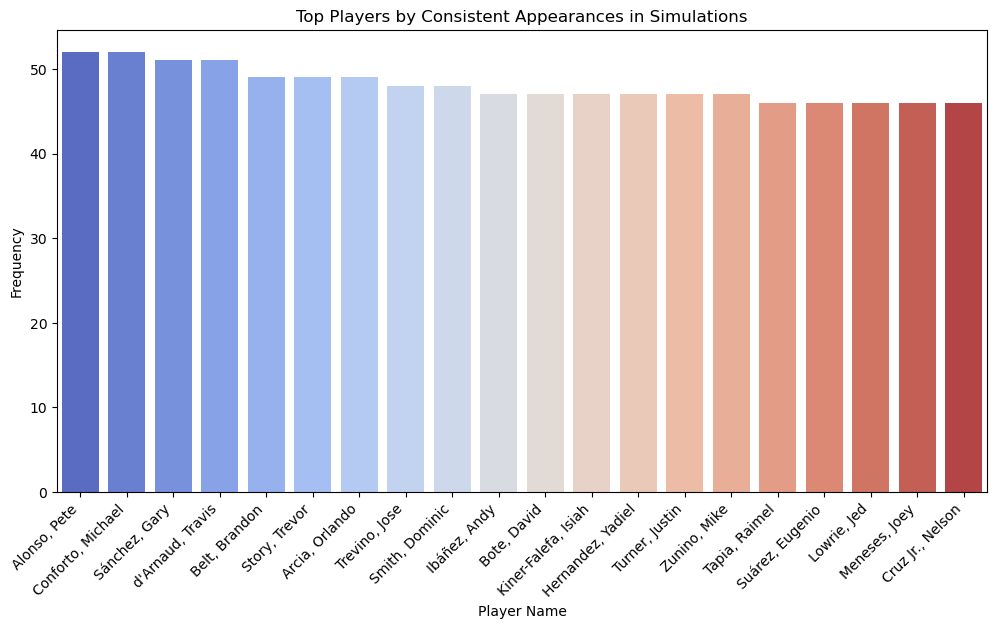

Top Players with Consistent Appearances:
    Frequency          Player Name
0          52         Alonso, Pete
1          52    Conforto, Michael
2          51        Sánchez, Gary
3          51     d'Arnaud, Travis
4          49        Belt, Brandon
5          49        Story, Trevor
6          49       Arcia, Orlando
7          48        Trevino, Jose
8          48       Smith, Dominic
12         47         Ibáñez, Andy
14         47          Bote, David
13         47  Kiner-Falefa, Isiah
10         47    Hernandez, Yadiel
11         47       Turner, Justin
9          47         Zunino, Mike
15         46        Tapia, Raimel
16         46      Suárez, Eugenio
17         46          Lowrie, Jed
18         46        Meneses, Joey
19         46     Cruz Jr., Nelson


In [24]:
# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_df, x='Player Name', y='Frequency', palette='coolwarm')
plt.title('Top Players by Consistent Appearances in Simulations')
plt.xlabel('Player Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# 결과 출력
print("Top Players with Consistent Appearances:")
print(top_20_df)

In [25]:
# 선수별 평균 wOBA 데이터 생성 (2021~2024년)
player_performance = player_data.groupby(['last_name, first_name', 'year'])['woba'].mean().unstack()


# Top 20 선수 필터링
filtered_top_20 = []

for _, row in top_20_df.iterrows():
    player_name = row['Player Name']  # 선수 이름
    if player_name in player_performance.index:  # 성과 데이터에 선수 이름이 있는지 확인
        # 선수의 연도별 woba 데이터 추출
        woba_trend = player_performance.loc[player_name]

        # 2023년, 2024년에 모두 데이터가 없는 선수 제외
        if pd.isna(woba_trend.get(2023)) and pd.isna(woba_trend.get(2024)):
            continue

        # 조건을 만족하는 선수 추가
        filtered_top_20.append(player_name)

# 결과 출력
print("Filtered Top Players After Excluding Those with Decreasing Trends or Missing Data:")
print(filtered_top_20)

Filtered Top Players After Excluding Those with Decreasing Trends or Missing Data:
['Alonso, Pete', 'Conforto, Michael', "d'Arnaud, Travis", 'Belt, Brandon', 'Arcia, Orlando', 'Smith, Dominic', 'Ibáñez, Andy', 'Kiner-Falefa, Isiah', 'Turner, Justin', 'Suárez, Eugenio', 'Meneses, Joey']


C:\Users\a\AppData\Local\Temp\ipykernel_42760\2623189743.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x='Player Name', y='Frequency', palette='coolwarm')


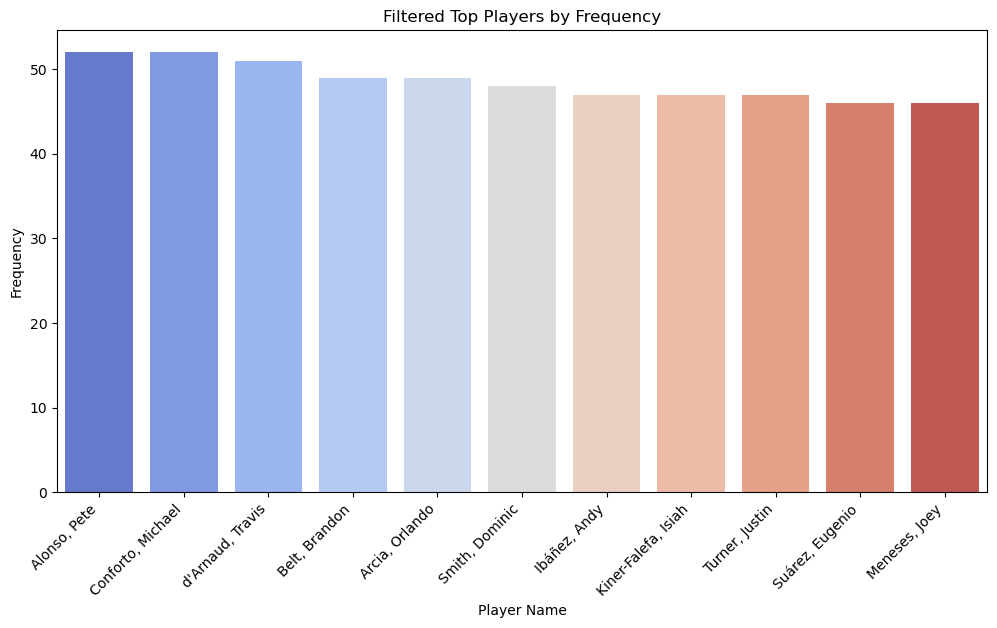

In [26]:
# Filter top_20_df to include only the filtered players
filtered_df = top_20_df[top_20_df['Player Name'].isin(filtered_top_20)].copy()

# Sort by Frequency for better visualization
filtered_df = filtered_df.sort_values(by='Frequency', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='Player Name', y='Frequency', palette='coolwarm')
plt.title('Filtered Top Players by Frequency')
plt.xlabel('Player Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()